In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
import pandas as pd
import numpy as np
import random
import math
import sklearn
import scipy as sp
import networkx
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
from causalgraphicalmodels import CausalGraphicalModel

### AGGREGATE DEMAND $(DA)$ AND AGGREGATE SUPPLY $(OA)$ MODEL:

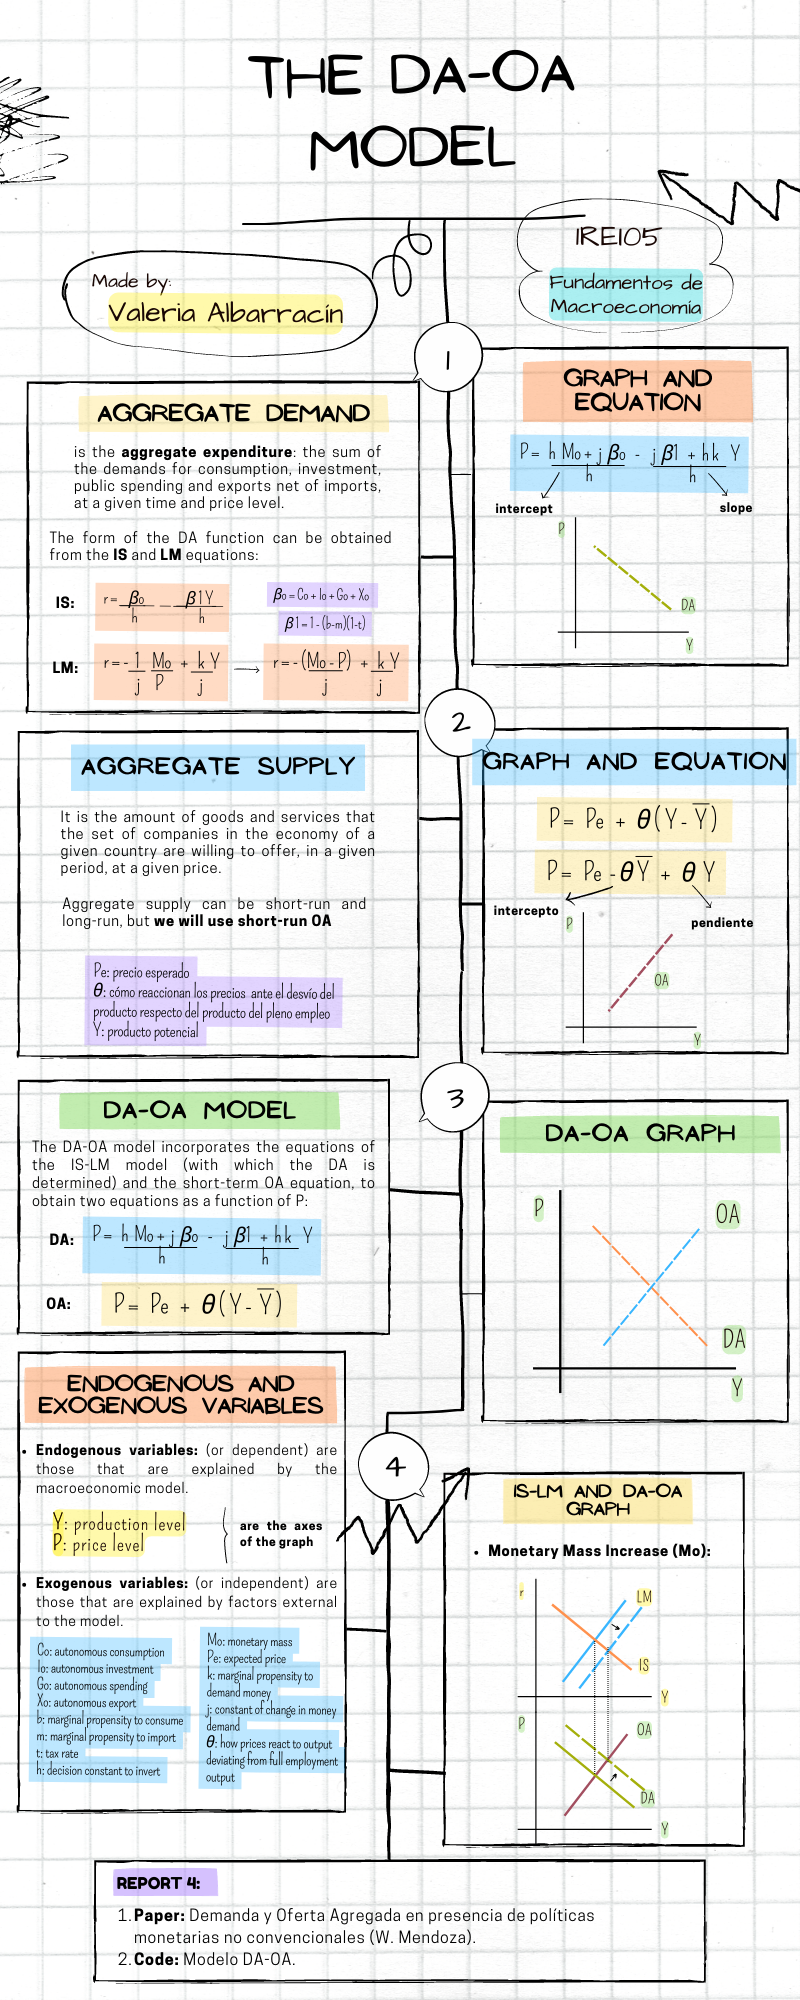

#### 1. Aggregate Demand $(DA)$:

Mathematically, the form of the aggregate demand function can be obtained from the IS and LM equations, eliminating $r$ and solving for $P$.

Considering, on the one hand, the equation of the IS Curve:

$$ r = \frac{B_o}{h} - \frac{B_1}{h}Y $$

Where $ B_0 = C_o + I_o + G_o + X_o $ and $ B_1 = 1 - (b - m)(1 - t)$

And, on the other hand, the equation of the LM Curve:

$$  r = -\frac{1}{j}\frac{Mo^s}{P} + \frac{k}{j}Y $$

Eliminating $r$ and solving for $P$, we obtain:

$$  P = -\frac{h Mo^s}{-j B_o + (jB_1 + hk)Y} $$

Or, depending on income level $(Y)$:

$$  Y = \frac{jB_o}{jB_1 + hk} + (\frac{hMo^s}{jB_1 + hk})\frac{1}{P} $$


Now, considering the equilibrium equation in the money market

$$ Mo^s - P = kY - jr $$

$(r)$ is replaced, and the aggregate demand equation is obtained $(DA)$

$$  P = \frac{h Mo^s + jB_o}{h} - \frac{jB_1 + hk}{h}Y $$


In [3]:
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

k = 2
j = 1                
Ms = 200             
P  = 20  

Y = np.arange(Y_size)


# Ecuación

B0 = Co + Io + Go + Xo
B1 = 1 - (b-m)*(1-t)

def P_AD(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_AD = P_AD(h, Ms, j, B0, B1, k, Y)

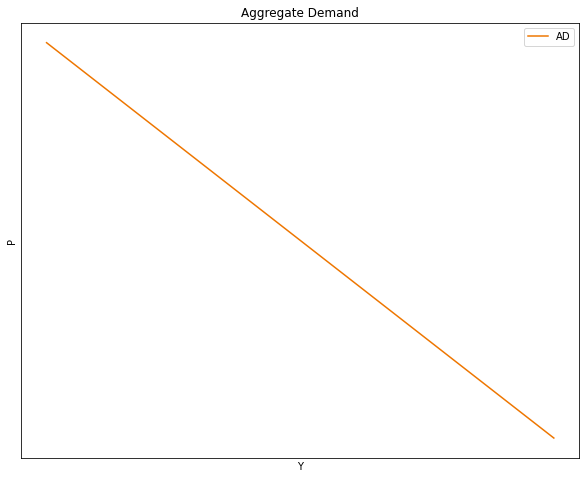

In [4]:
y_max = np.max(P_AD)

fig, ax = plt.subplots(figsize=(10, 8))
ax.set(title="Aggregate Demand", xlabel= r'Y', ylabel= r'P')
ax.plot(Y, P_AD, "#EE7600", label = "AD")  

ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

ax.legend()
plt.show()

In [5]:
#--------------------------------------------------
    # Curva IS

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#--------------------------------------------------
    # Curva LM 

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

# Dos curvas adicionales

Ms = 800
def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_Ms1 = i_LM( k, j, Ms, P, Y)

Ms = 1400
def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_Ms2 = i_LM( k, j, Ms, P, Y)

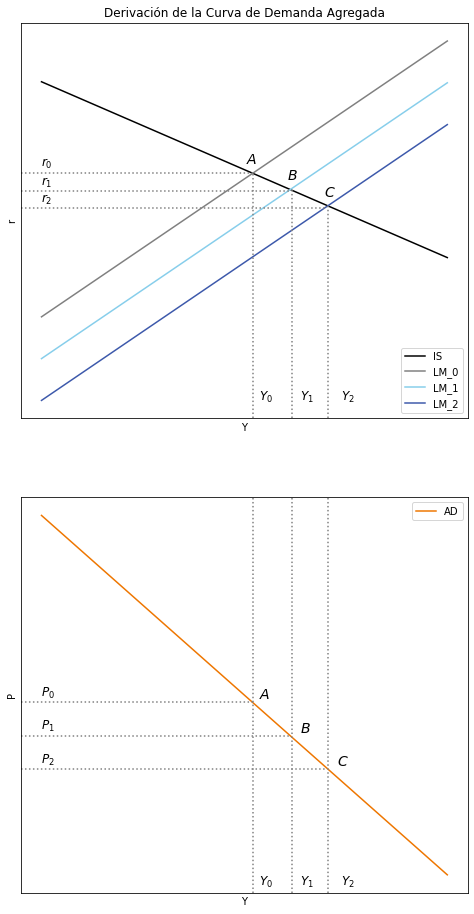

In [6]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 16)) 

ax1.set(title="Derivación de la Curva de Demanda Agregada", xlabel= r'Y', ylabel= r'r')
ax1.plot(Y, r, label = "IS", color = "black") #IS
ax1.plot(Y, i, label="LM_0", color = "grey")  #LM_0
ax1.plot(Y, i_Ms1, label="LM_1", color = "skyblue")  #LM_1
ax1.plot(Y, i_Ms2, label="LM_2", color = "#3D59AB")  #LM_2

ax1.yaxis.set_major_locator(plt.NullLocator())   
ax1.xaxis.set_major_locator(plt.NullLocator())

ax1.axvline(x=51.5,  ymin= 0, ymax= 0.62, linestyle = ":", color = "grey")
ax1.axvline(x=61,  ymin= 0, ymax= 0.58, linestyle = ":", color = "grey")
ax1.axvline(x=70,  ymin= 0, ymax= 0.54, linestyle = ":", color = "grey")

ax1.axhline(y=93, xmin= 0, xmax= 0.52, linestyle = ":", color = "grey")
ax1.axhline(y=80, xmin= 0, xmax= 0.6, linestyle = ":", color = "grey")
ax1.axhline(y=68, xmin= 0, xmax= 0.68, linestyle = ":", color = "grey")

ax1.text(50,100, '$A$', fontsize = 14, color = 'black')
ax1.text(60,88, '$B$', fontsize = 14, color = 'black')
ax1.text(69,76, '$C$', fontsize = 14, color = 'black')

ax1.text(0,98, '$r_0$', fontsize = 12, color = 'black')
ax1.text(0,84, '$r_1$', fontsize = 12, color = 'black')
ax1.text(0,72, '$r_2$', fontsize = 12, color = 'black')

ax1.text(53,-70, '$Y_0$', fontsize = 12, color = 'black')
ax1.text(63,-70, '$Y_1$', fontsize = 12, color = 'black')
ax1.text(73,-70, '$Y_2$', fontsize = 12, color = 'black')

ax1.legend()

#------

ax2.set( xlabel= r'Y', ylabel= r'P')

ax2.plot(Y, P_AD, "#EE7600", label = "AD")  

ax2.yaxis.set_major_locator(plt.NullLocator())   
ax2.xaxis.set_major_locator(plt.NullLocator())

ax2.axvline(x=51.5,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax2.axvline(x=61,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax2.axvline(x=70,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")

ax2.axhline(y=190, xmin= 0, xmax= 0.52, linestyle = ":", color = "grey")
ax2.axhline(y=160, xmin= 0, xmax= 0.6, linestyle = ":", color = "grey")
ax2.axhline(y=130, xmin= 0, xmax= 0.68, linestyle = ":", color = "grey")

ax2.text(53,193, '$A$', fontsize = 14, color = 'black')
ax2.text(63,163, '$B$', fontsize = 14, color = 'black')
ax2.text(72,133, '$C$', fontsize = 14, color = 'black')

ax2.text(0,195, '$P_0$', fontsize = 12, color = 'black')
ax2.text(0,165, '$P_1$', fontsize = 12, color = 'black')
ax2.text(0,135, '$P_2$', fontsize = 12, color = 'black')

ax2.text(53,25, '$Y_0$', fontsize = 12, color = 'black')
ax2.text(63,25, '$Y_1$', fontsize = 12, color = 'black')
ax2.text(73,25, '$Y_2$', fontsize = 12, color = 'black')

ax2.legend()

plt.show()


#### 2. Aggregate Supply $(OA)$:

#### - Aggregate Supply in the short term:

The short term is a period in which the product $(Y)$ is located below or above its long term level or Potential Product $(\bar{Y})$.

Then, the short-term $OA$ curve can be represented with the following equation:

$$ P = P^e + θ(Y - \bar{Y}) $$ 

- Where $(P)$ is the price level, $(P^e)$ the expected price and $\bar{Y}$ the potential product.

In [7]:
# Parámetros

Y_size = 100

Pe = 150   #precio esperado
θ = 10
_Y = 62   #producto potencial

Y = np.arange(Y_size)


# Ecuación

def P_AS(Pe, _Y, Y, θ):
    P_AS = Pe + θ*(Y-_Y)
    return P_AS

P_AS = P_AS(Pe, _Y, Y, θ)

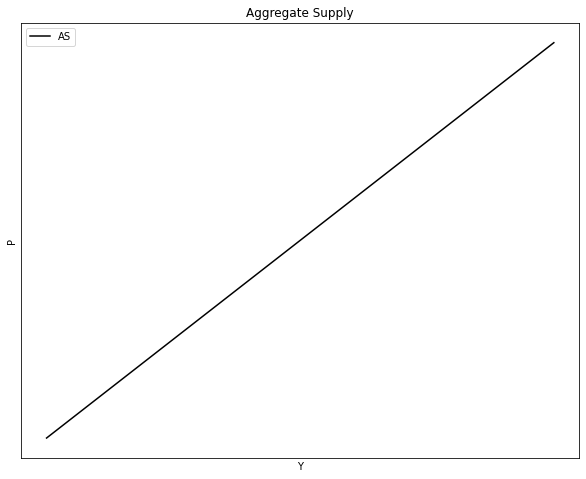

In [8]:
y_max = np.max(P_AS)

fig, ax = plt.subplots(figsize=(10, 8))
ax.set(title="Aggregate Supply", xlabel= r'Y', ylabel= r'P')
ax.plot(Y, P_AS, "k-", label = "AS")  
ax.legend()

ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

plt.show()

#### 3. Equilibrium between Aggregate Demand and Aggregate Supply: DA-OA Model

In [9]:
#1--------------------------
    # Demanda Agregada
    
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

k = 2
j = 1                
Ms = 200             
P  = 8  

Y = np.arange(Y_size)


# Ecuación

B0 = Co + Io + Go + Xo
B1 = 1 - (b-m)*(1-t)

def P_AD(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_AD = P_AD(h, Ms, j, B0, B1, k, Y)


#2--------------------------
    # Oferta Agregada
    
# Parámetros

Y_size = 100

Pe = 100 
θ = 3
_Y = 20   

Y = np.arange(Y_size)


# Ecuación

def P_AS(Pe, _Y, Y, θ):
    P_AS = Pe + θ*(Y-_Y)
    return P_AS

P_AS = P_AS(Pe, _Y, Y, θ)

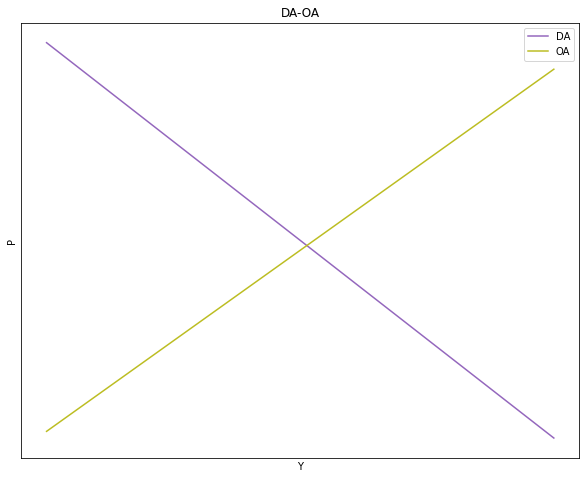

In [10]:
    # Gráfico del modelo DA-OA

# Dimensiones del gráfico

y_max = np.max(P)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar 
ax.plot(Y, P_AD, label = "DA", color = "C4") #DA
ax.plot(Y, P_AS, label = "OA", color = "C8") #OA

# Eliminar valores de ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Título, ejes y leyenda
ax.set(title="DA-OA", xlabel= r'Y', ylabel= r'P')
ax.legend()

plt.show()

#### 4. Comparative statics:

#### - Increase in Expected Price $(P^e)$:

In [11]:
#1--------------------------------------------------
    # Curva IS ORIGINAL

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#2--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 8           

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

#--------------------------------------------------
    # NUEVA curva LM: incremento en la Masa Monetaria (Ms)

# Definir SOLO el parámetro cambiado
P = 50

# Generar la ecuación con el nuevo parámetro
def i_LM_P( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_P = i_LM_P( k, j, Ms, P, Y)

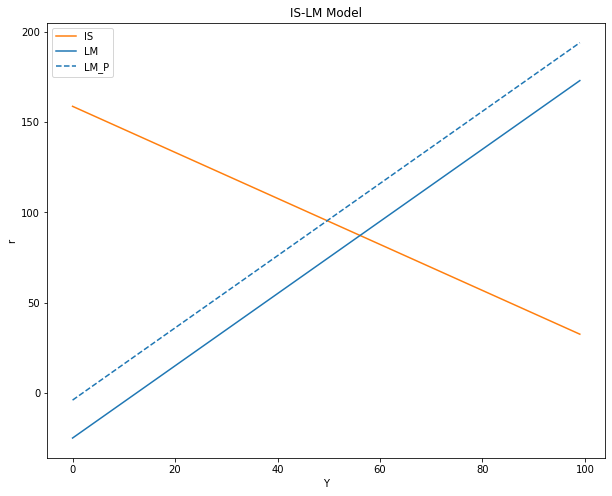

In [12]:
    # Gráfico del modelo IS-LM

# Dimensiones del gráfico
y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r, label = "IS", color = "C1") #IS
ax.plot(Y, i, label="LM", color = "C0")  #LM
ax.plot(Y, i_P, label="LM_P", color = "C0", linestyle ='dashed')  #LM_P

# Título, ejes y leyenda
ax.set(title="IS-LM Model", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

In [13]:
#1--------------------------
    # Demanda Agregada ORGINAL
    
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

k = 2
j = 1                
Ms = 200             
P  = 8  

Y = np.arange(Y_size)


# Ecuación

B0 = Co + Io + Go + Xo
B1 = 1 - (b-m)*(1-t)

def P_AD(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_AD = P_AD(h, Ms, j, B0, B1, k, Y)


#2--------------------------
    # Oferta Agregada ORIGINAL
    
# Parámetros

Y_size = 100

Pe = 70
θ = 3
_Y = 20  

Y = np.arange(Y_size)

# Ecuación

def P_AS(Pe, _Y, Y, θ):
    P_AS = Pe + θ*(Y-_Y)
    return P_AS

P_AS = P_AS(Pe, _Y, Y, θ)


#--------------------------------------------------
    # NUEVA Oferta Agregada

# Definir SOLO el parámetro cambiado

Pe = 103

# Generar la ecuación con el nuevo parámetro

def P_AS_Pe(Pe, _Y, Y, θ):
    P_AS = Pe + θ*(Y-_Y)
    return P_AS

P_Pe = P_AS_Pe(Pe, _Y, Y, θ)

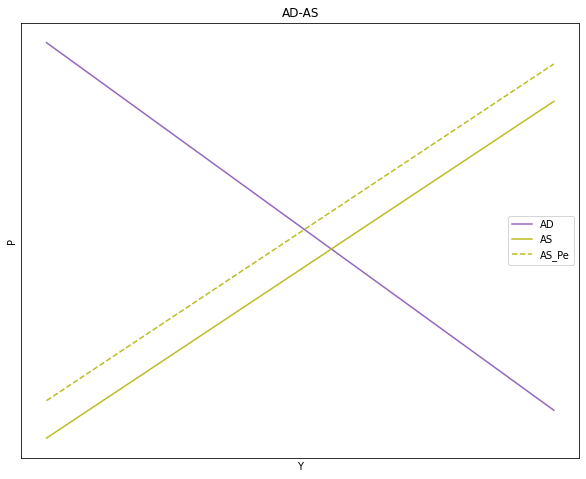

In [14]:
    # Gráfico del modelo DA-OA

# Dimensiones del gráfico

y_max = np.max(P)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar 
ax.plot(Y, P_AD, label = "AD", color = "C4") #DA
ax.plot(Y, P_AS, label = "AS", color = "C8") #OA
ax.plot(Y, P_Pe, label = "AS_Pe", color = "C8", linestyle = 'dashed') #OA_Pe

# Eliminar valores de ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Título, ejes y leyenda
ax.set(title="AD-AS", xlabel= r'Y', ylabel= r'P')
ax.legend()

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

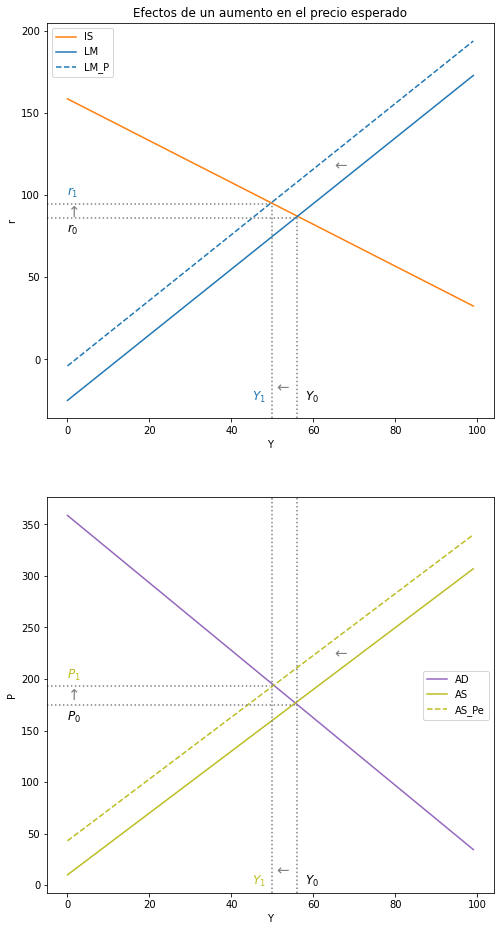

In [15]:
# Dos gráficos en un solo cuadro
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 16)) 

#---------------------------------
    # Gráfico 1: IS-LM
    
ax1.plot(Y, r, label = "IS", color = "C1") #IS
ax1.plot(Y, i, label="LM", color = "C0")  #LM
ax1.plot(Y, i_P, label="LM_P", color = "C0", linestyle ='dashed')  #LM

ax1.axvline(x=50,  ymin= 0, ymax= 0.55, linestyle = ":", color = "grey")
ax1.axvline(x=56,  ymin= 0, ymax= 0.51, linestyle = ":", color = "grey")
ax1.axhline(y=94.5,  xmin= 0, xmax= 0.5, linestyle = ":", color = "grey")
ax1.axhline(y=86,  xmin= 0, xmax= 0.56, linestyle = ":", color = "grey")

ax1.text(65, 115, '←', fontsize=15, color='grey')
ax1.text(51, -20, '←', fontsize=15, color='grey')
ax1.text(0, 87, '↑', fontsize=15, color='grey')
ax1.text(58, -25, '$Y_0$', fontsize=12, color='black')
ax1.text(45, -25, '$Y_1$', fontsize=12, color='C0')
ax1.text(0, 77, '$r_0$', fontsize=12, color='black')
ax1.text(0, 100, '$r_1$', fontsize=12, color='C0')


ax1.set(title="Efectos de un aumento en el precio esperado", xlabel= r'Y', ylabel= r'r')
ax1.legend()


#---------------------------------
    # Gráfico 2:

ax2.plot(Y, P_AD, label = "AD", color = "C4") #DA
ax2.plot(Y, P_AS, label = "AS", color = "C8") #OA
ax2.plot(Y, P_Pe, label = "AS_Pe", color = "C8", linestyle = 'dashed') #OA_Pe

ax2.axvline(x=50,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax2.axvline(x=56,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax2.axhline(y=193,  xmin= 0, xmax= 0.5, linestyle = ":", color = "grey")
ax2.axhline(y=175,  xmin= 0, xmax= 0.56, linestyle = ":", color = "grey")

ax2.text(51, 10, '←', fontsize=15, color='grey')
ax2.text(65, 220, '←', fontsize=15, color='grey')
ax2.text(0, 180, '↑', fontsize=15, color='grey')

ax2.text(58, 0, '$Y_0$', fontsize=12, color='black')
ax2.text(45, 0, '$Y_1$', fontsize=12, color='C8')
ax2.text(0, 160, '$P_0$', fontsize=12, color='black')
ax2.text(0, 200, '$P_1$', fontsize=12, color='C8')

ax2.set(xlabel= r'Y', ylabel= r'P')
ax2.legend()

plt.show


#### - Increase in Monetary Mass $(M_o^s)$:

In [16]:
# IS-LM

#1--------------------------------------------------
    # Curva IS ORIGINAL

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#2--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 8           

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

#--------------------------------------------------
    # NUEVA curva LM: incremento en la Masa Monetaria (Ms)

# Definir SOLO el parámetro cambiado
Ms = 500

# Generar la ecuación con el nuevo parámetro
def i_LM_Ms( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_Ms = i_LM_Ms( k, j, Ms, P, Y)

In [17]:
#DA-OA

#1--------------------------
    # Demanda Agregada ORGINAL
    
# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.4
m = 0.5
t = 0.8

k = 2
j = 1                
Ms = 200             
P  = 8  

Y = np.arange(Y_size)


# Ecuación

B0 = Co + Io + Go + Xo
B1 = 1 - (b-m)*(1-t)

def P_AD(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_AD = P_AD(h, Ms, j, B0, B1, k, Y)

#--------------------------------------------------
    # NUEVA Demanda Agregada

# Definir SOLO el parámetro cambiado

Ms = 275

# Generar la ecuación con el nuevo parámetro

def P_AD_Ms(h, Ms, j, B0, B1, k, Y):
    P_AD = ((h*Ms + j*B0)/h) - (Y*(j*B1 + h*k)/h)
    return P_AD

P_Ms = P_AD_Ms(h, Ms, j, B0, B1, k, Y)


#2--------------------------
    # Oferta Agregada ORIGINAL
    
# Parámetros

Y_size = 100

Pe = 70
θ = 3
_Y = 20  

Y = np.arange(Y_size)

# Ecuación

def P_AS(Pe, _Y, Y, θ):
    P_AS = Pe + θ*(Y-_Y)
    return P_AS

P_AS = P_AS(Pe, _Y, Y, θ)

<function matplotlib.pyplot.show(close=None, block=None)>

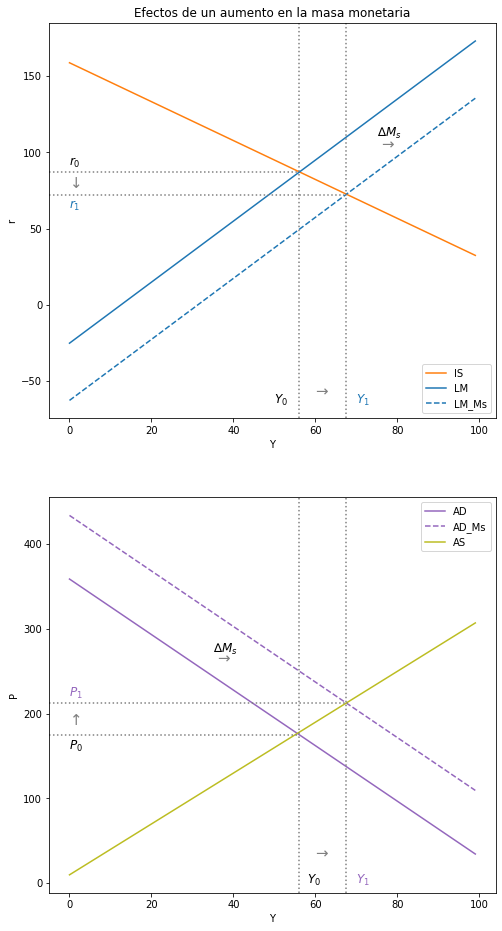

In [18]:
# Dos gráficos en un solo cuadro
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 16)) 

#---------------------------------
    # Gráfico 1: IS-LM
    
ax1.plot(Y, r, label = "IS", color = "C1") #IS
ax1.plot(Y, i, label="LM", color = "C0")  #LM
ax1.plot(Y, i_Ms, label="LM_Ms", color = "C0", linestyle ='dashed')  #LM

ax1.axvline(x=67.5,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax1.axvline(x=56,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax1.axhline(y=72,  xmin= 0, xmax= 0.66, linestyle = ":", color = "grey")
ax1.axhline(y=87,  xmin= 0, xmax= 0.56, linestyle = ":", color = "grey")

ax1.text(75, 110, '∆$M_s$', fontsize=12, color='black')
ax1.text(76, 102, '→', fontsize=15, color='grey')
ax1.text(60, -60, '→', fontsize=15, color='grey')
ax1.text(0, 77, '↓', fontsize=15, color='grey')
ax1.text(50, -65, '$Y_0$', fontsize=12, color='black')
ax1.text(70, -65, '$Y_1$', fontsize=12, color='C0')
ax1.text(0, 91, '$r_0$', fontsize=12, color='black')
ax1.text(0, 63, '$r_1$', fontsize=12, color='C0')


ax1.set(title="Efectos de un aumento en la masa monetaria", xlabel= r'Y', ylabel= r'r')
ax1.legend()


#---------------------------------
    # Gráfico 2: DA-OA

ax2.plot(Y, P_AD, label = "AD", color = "C4") #DA
ax2.plot(Y, P_Ms, label = "AD_Ms", color = "C4", linestyle = 'dashed') #DA_Ms
ax2.plot(Y, P_AS, label = "AS", color = "C8") #OA

ax2.axvline(x=67.5,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax2.axvline(x=56,  ymin= 0, ymax= 1, linestyle = ":", color = "grey")
ax2.axhline(y=213,  xmin= 0, xmax= 0.67, linestyle = ":", color = "grey")
ax2.axhline(y=175,  xmin= 0, xmax= 0.56, linestyle = ":", color = "grey")

ax2.text(60, 30, '→', fontsize=15, color='grey')
ax2.text(36, 260, '→', fontsize=15, color='grey')
ax2.text(35, 272, '∆$M_s$', fontsize=12, color='black')
ax2.text(0, 187, '↑', fontsize=15, color='grey')

ax2.text(58, 0, '$Y_0$', fontsize=12, color='black')
ax2.text(70, 0, '$Y_1$', fontsize=12, color='C4')
ax2.text(0, 158, '$P_0$', fontsize=12, color='black')
ax2.text(0, 220, '$P_1$', fontsize=12, color='C4')

ax2.set(xlabel= r'Y', ylabel= r'P')
ax2.legend()

plt.show